## Business Problems
...

### Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load  Data & Features Details

In [3]:
red = pd.read_csv("winequality-red.csv", sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


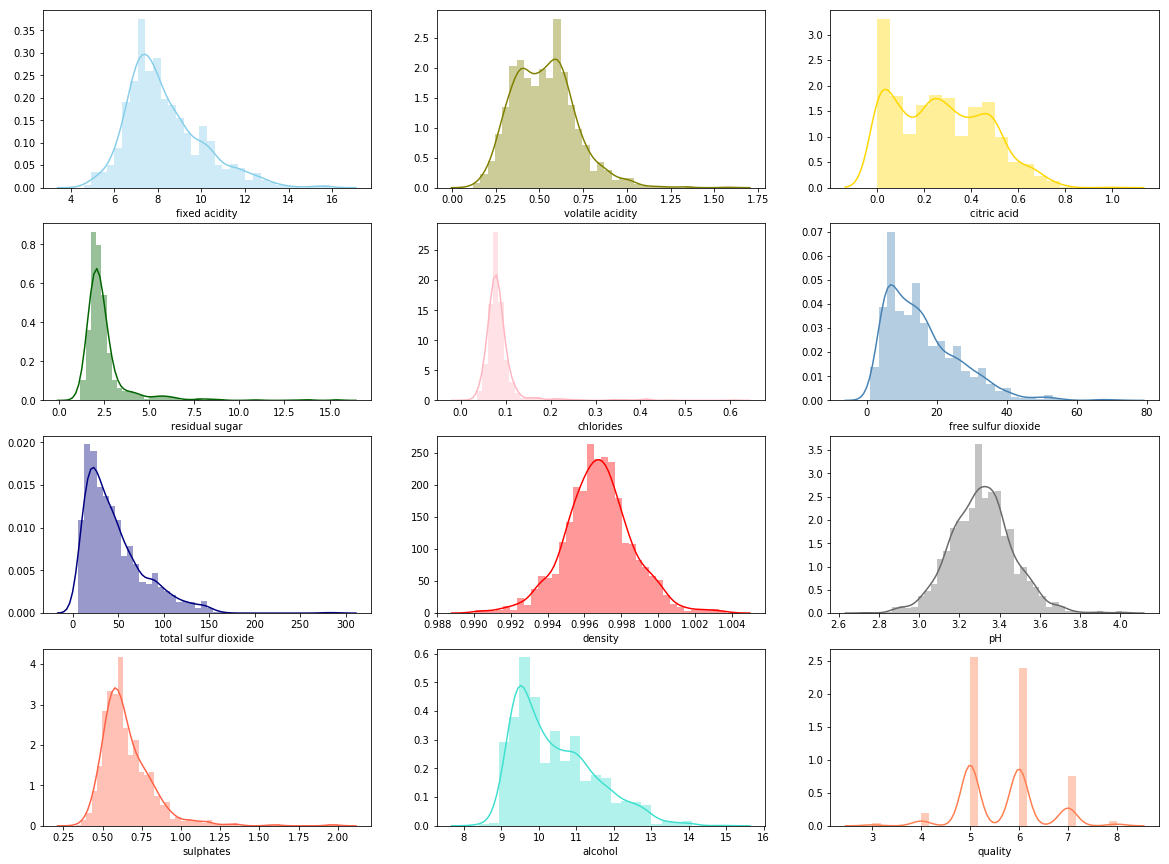

In [6]:
f, axes = plt.subplots(4, 3, figsize=(20, 15), sharex=False)
sns.distplot( red["fixed acidity"] , color="skyblue",  ax=axes[0, 0])
sns.distplot( red["volatile acidity"] , color="olive", ax=axes[0, 1])
sns.distplot( red["citric acid"] , color="gold", ax=axes[0, 2])
sns.distplot( red["residual sugar"] , color="darkgreen", ax=axes[1, 0])
sns.distplot( red["chlorides"] , color="lightpink", ax=axes[1, 1])
sns.distplot( red["free sulfur dioxide"] , color="steelblue", ax=axes[1, 2])
sns.distplot( red["total sulfur dioxide"] , color="navy", ax=axes[2, 0])
sns.distplot( red["density"] , color="r", ax=axes[2, 1])
sns.distplot( red["pH"] , color="dimgrey", ax=axes[2, 2])
sns.distplot( red["sulphates"] , color="tomato", ax=axes[3, 0])
sns.distplot( red["alcohol"] , color="turquoise", ax=axes[3, 1])
sns.distplot( red["quality"] , color="coral", ax=axes[3, 2])

In [7]:
red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

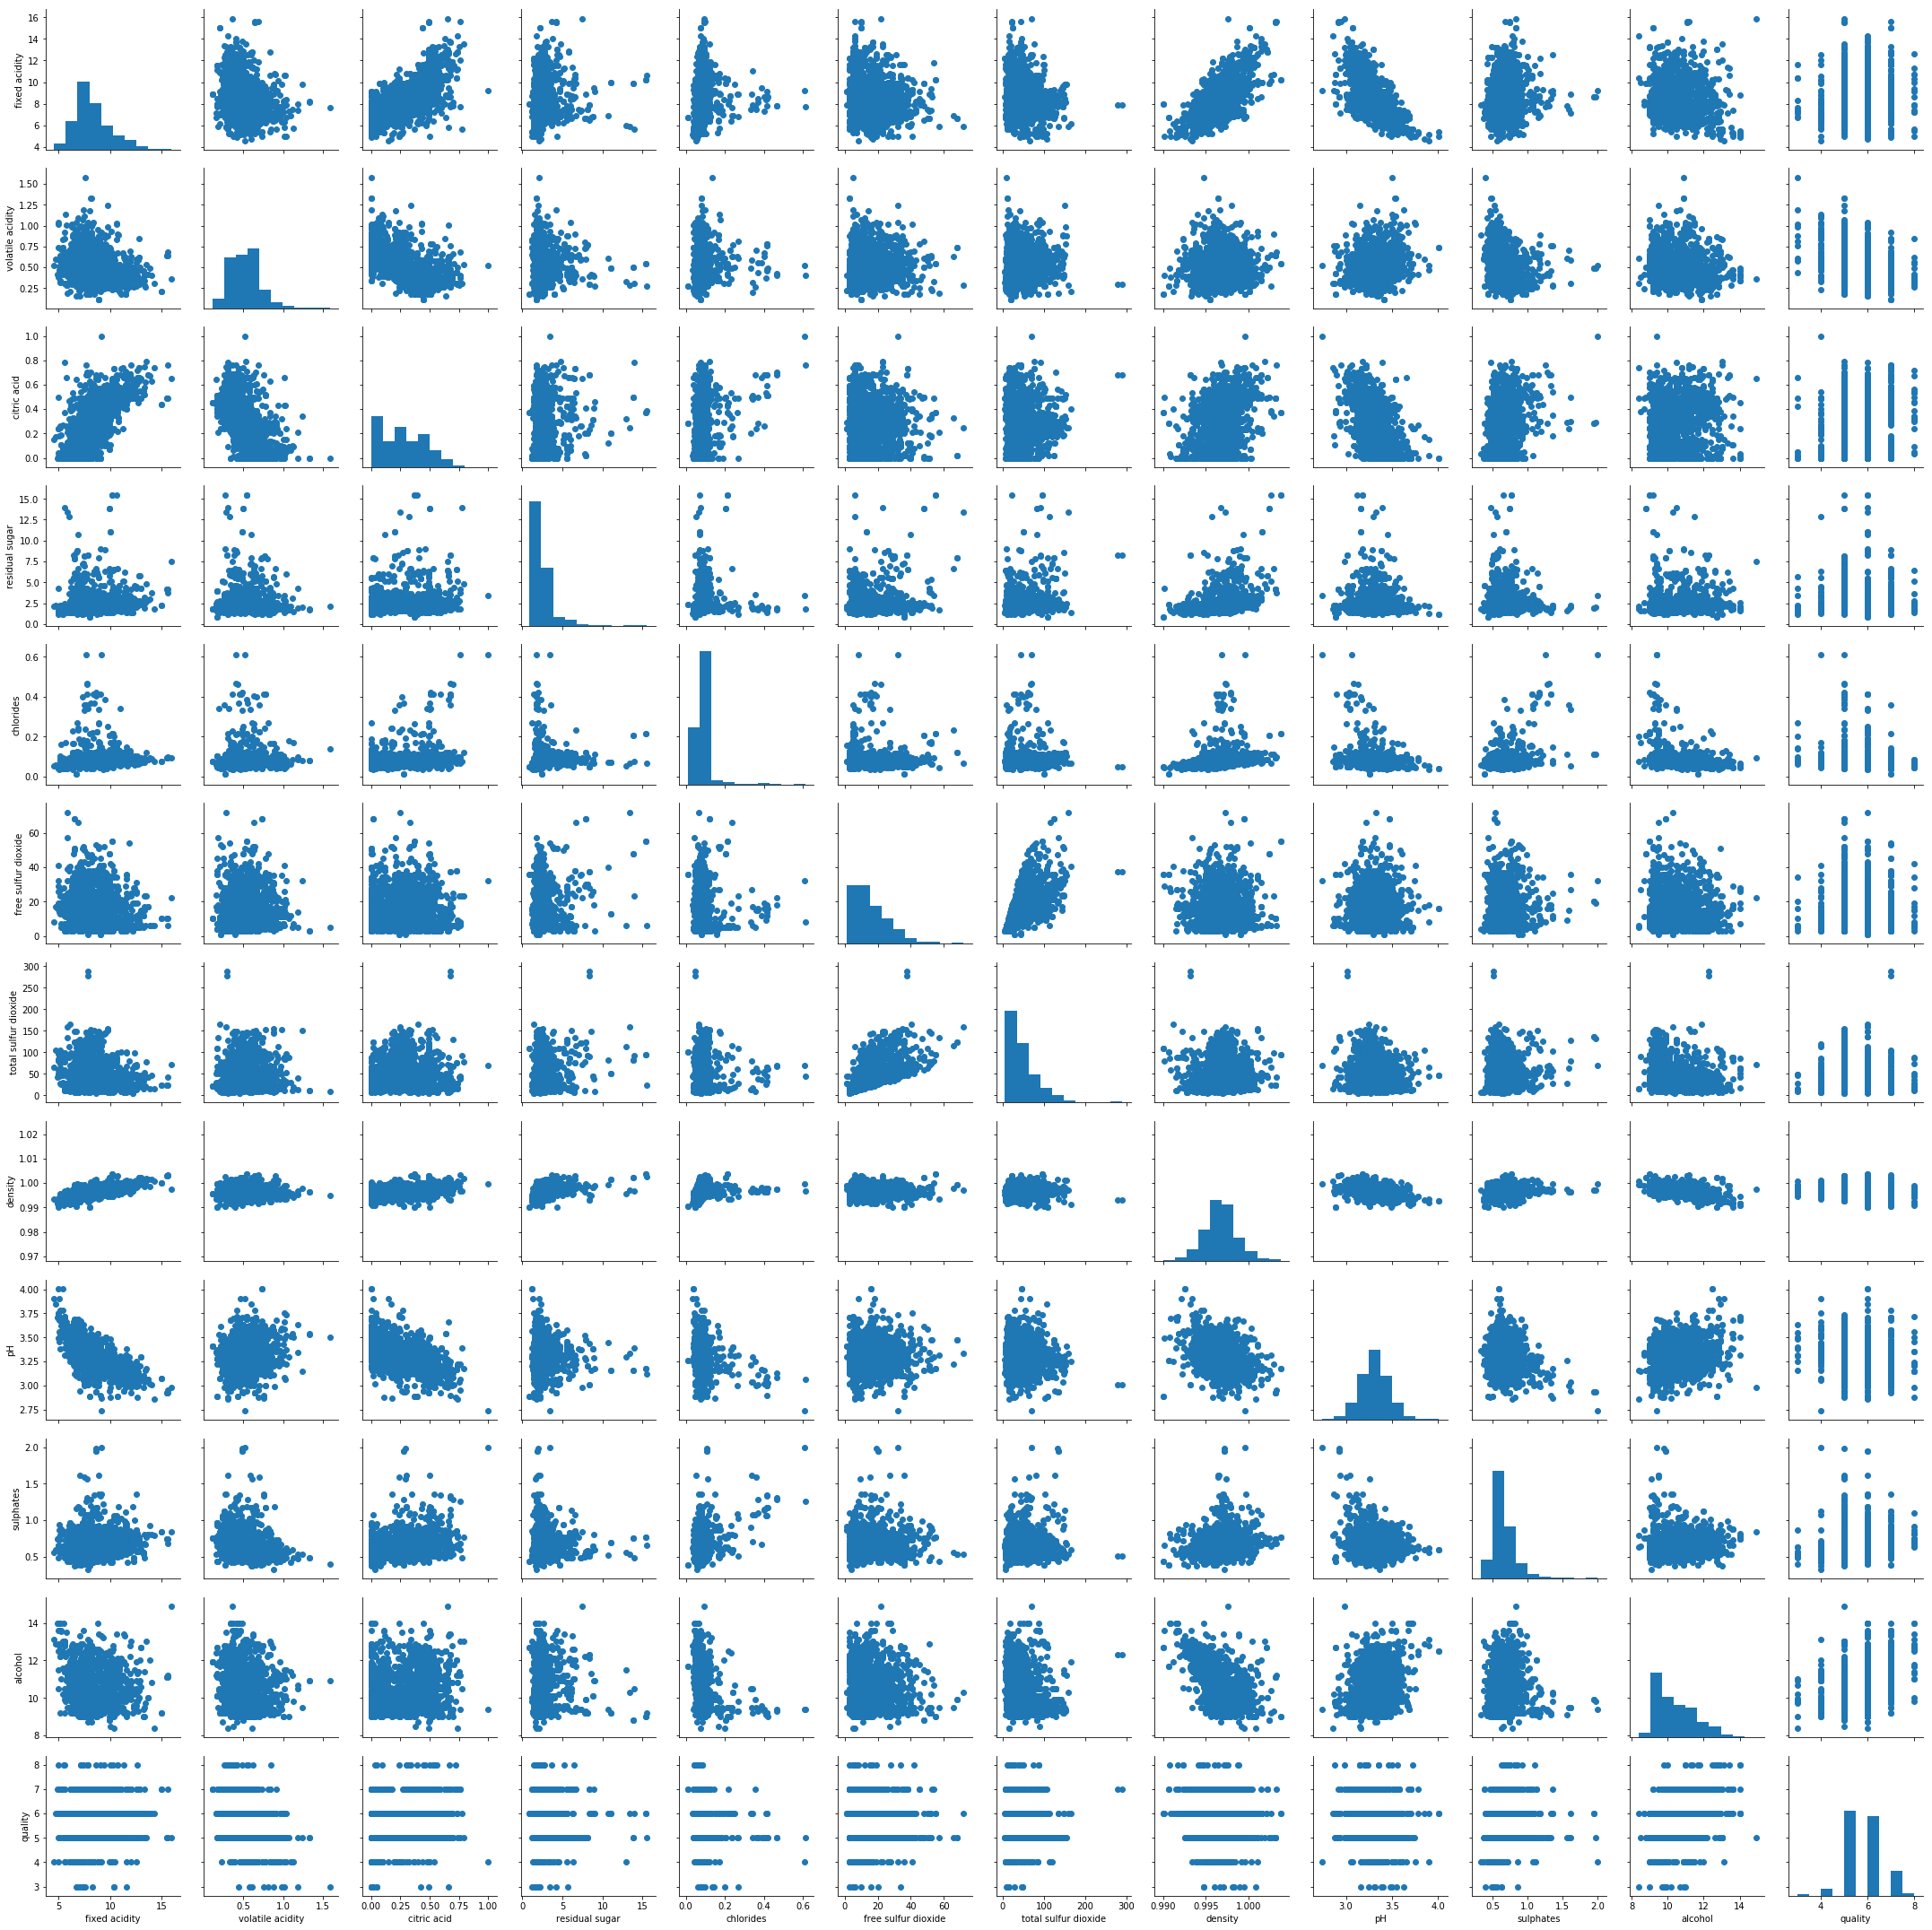

In [8]:
#PairGrid Plot
ax = sns.PairGrid(red)
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)

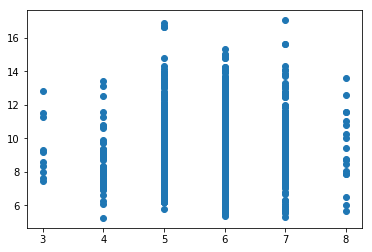

In [11]:
plt.scatter(red["quality"],red['fixed acidity']+red['volatile acidity']+red['citric acid'])

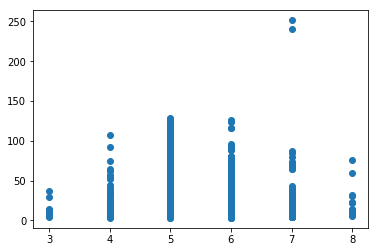

In [12]:
plt.scatter(red["quality"],red['total sulfur dioxide']-red['free sulfur dioxide'])

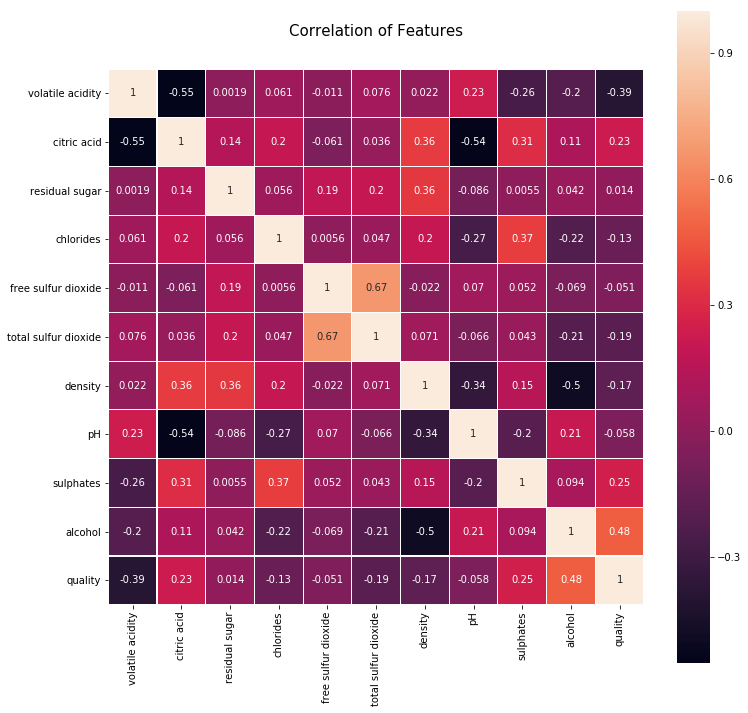

In [9]:
#Heat Map
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(red.iloc[:,1:13].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

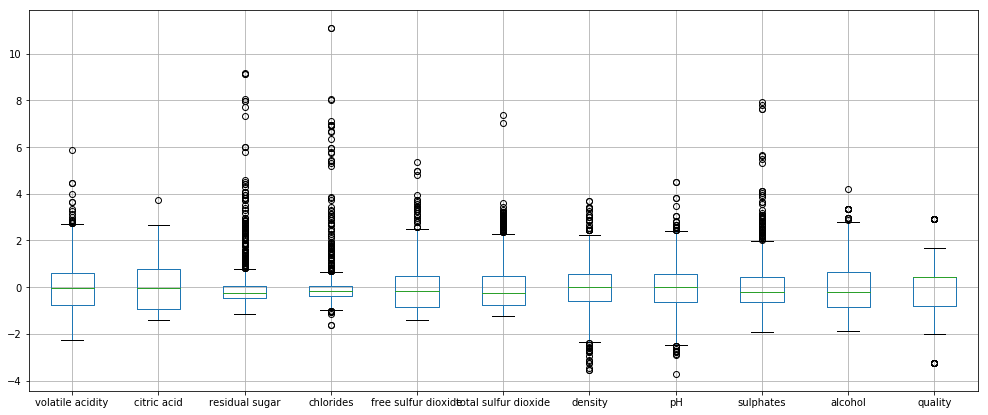

In [10]:
#BoxPlot
plt.figure(figsize=(17, 7))

((red.iloc[:,1:13] - red.iloc[:,1:13].mean()) / red.iloc[:,1:13].std()).boxplot()